In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("newplacementdata.csv")

In [5]:
df.head(2)

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df["placement_exam_marks"].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

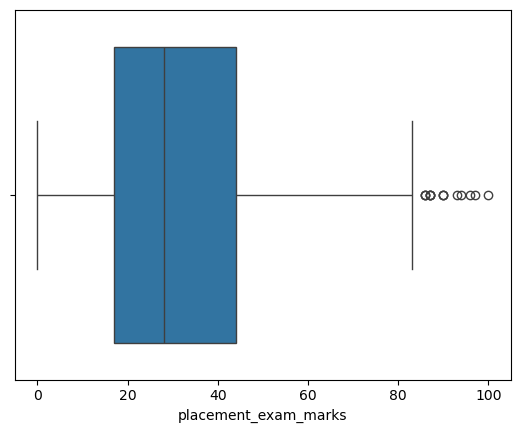

In [15]:
sns.boxplot(x=df["placement_exam_marks"])

In [17]:
#Finding the IRQ

percentile25 = df['placement_exam_marks'].quantile (0.25)

percentile75 = df['placement_exam_marks'].quantile(0.75)

In [19]:
percentile25

17.0

In [21]:
percentile75

44.0

In [23]:
IQR=percentile75-percentile25

In [27]:
upper_limit=percentile75+1.5*IQR
upper_limit

84.5

In [29]:
lower_limit=percentile25-1.5*IQR
lower_limit

-23.5

In [33]:
df[df["placement_exam_marks"] < lower_limit]

,cgpa,placement_exam_marks,placed


In [45]:
newdf=df[df["placement_exam_marks"] < upper_limit]

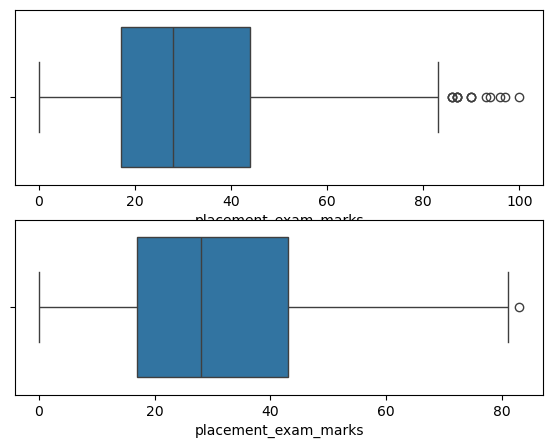

In [47]:
plt.figure(figsize = (15,5))

plt.subplot(222)

sns.boxplot(x = df['placement_exam_marks'])

plt.subplot(224)

sns.boxplot(x = newdf['placement_exam_marks'])

plt.show()

In [49]:
new_df_cap=df.copy()

In [51]:
new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,

    np.where(
    new_df_cap['placement_exam_marks'] < lower_limit,
    lower_limit,
    new_df_cap["placement_exam_marks"])

)

In [53]:
new_df_cap.shape

(1000, 3)

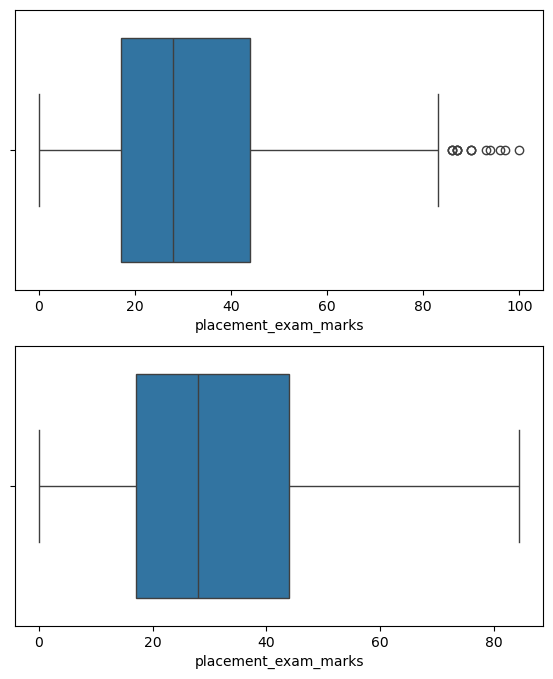

In [55]:
plt.figure(figsize = (15,8))

plt.subplot(222)

sns.boxplot(x=df ['placement_exam_marks'])

plt.subplot(224)

sns.boxplot(x=new_df_cap['placement_exam_marks'])

plt.show()